In [338]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import itertools
import seaborn as sns
import time

data = pd.read_csv('Book1.csv', index_col='Code',usecols=[''])

#data['medecin'] = data['medecin']/100
display(data)


,taux_locataire,mediane_niveau_vie,taille_moy_menage,part_diplome_sup,part_appartement,part_res_principale,taux_chomage,taux_urba,part_soixante_cinq_plus,densite_pop,...,agri,chef_entreprise,cadre,intermediaire,employe,ouvrier,part_immigre,medecin,part_jeune,part_diplome
Code,,,,,,,,,,,,,,,,,,,,,
01,35.8,23490,2.30,8.9,36.0,86.3,5.9,67.0,17.7,113.222465,...,1.0,6.3,14.7,26.4,26.5,24.4,11.8,1196,30.4,29.4
02,36.7,19880,2.26,4.1,23.7,86.5,11.1,53.2,20.2,72.177433,...,1.8,4.8,8.2,21.9,30.1,30.7,4.7,1234,29.8,19.1
03,33.0,20570,2.00,4.9,27.6,77.9,8.3,58.3,27.4,45.772475,...,3.4,6.5,8.8,22.3,31.7,26.1,5.1,969,24.8,21.1
04,36.9,20690,2.04,7.5,38.0,60.5,9.1,61.9,26.1,23.726033,...,2.6,9.6,10.9,25.5,29.6,20.6,8.0,492,24.7,27.4
05,35.6,21020,2.05,7.7,56.2,48.7,7.8,59.5,24.4,25.451098,...,2.8,9.4,9.8,26.7,32.0,18.7,5.7,623,25.3,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,39.6,24010,2.43,13.5,52.7,91.7,6.9,96.1,15.1,721.380514,...,0.1,4.4,22.0,28.1,27.7,16.1,16.7,3256,33.4,36.9
92,54.9,28310,2.20,30.7,87.3,89.7,6.6,100.0,15.2,9249.797848,...,0.0,4.9,39.8,23.9,21.9,8.2,18.5,6426,30.9,55.0
93,59.2,18070,2.54,10.1,74.6,92.9,10.9,100.0,11.9,6964.026249,...,0.0,5.0,15.0,22.8,32.8,21.2,30.7,4195,35.4,28.4


,taux_locataire,mediane_niveau_vie,taille_moy_menage,part_diplome_sup,part_appartement,part_res_principale,taux_chomage,taux_urba,part_soixante_cinq_plus,densite_pop,...,agri,chef_entreprise,cadre,intermediaire,employe,ouvrier,part_immigre,medecin,part_jeune,part_diplome
taux_locataire,1.000000,0.422124,0.318227,0.735905,0.848617,0.411921,0.299749,0.779619,-0.729332,0.619414,...,-0.569780,-0.364504,0.708705,0.318854,-0.321065,-0.569853,0.670553,0.749527,0.642657,0.701869
mediane_niveau_vie,0.422124,1.000000,0.150264,0.803386,0.618205,0.249683,-0.389265,0.479344,-0.522621,0.513729,...,-0.377836,-0.228273,0.799523,0.418764,-0.638508,-0.601710,0.422743,0.536962,0.347978,0.821644
taille_moy_menage,0.318227,0.150264,1.000000,0.086995,0.245394,0.531833,0.172476,0.447623,-0.753838,-0.025686,...,-0.413643,-0.447682,0.180927,0.373543,-0.122106,-0.046485,0.474337,0.095268,0.755679,0.139446
part_diplome_sup,0.735905,0.803386,0.086995,1.000000,0.789342,0.259107,-0.064602,0.644089,-0.551863,0.800079,...,-0.453093,-0.205128,0.969960,0.340601,-0.611582,-0.811423,0.635673,0.822568,0.383663,0.968347
part_appartement,0.848617,0.618205,0.245394,0.789342,1.000000,0.162816,0.125044,0.782784,-0.630054,0.581981,...,-0.543669,-0.172102,0.746139,0.469212,-0.310933,-0.720940,0.732222,0.677373,0.476178,0.803611
part_res_principale,0.411921,0.249683,0.531833,0.259107,0.162816,1.000000,0.039403,0.359597,-0.663619,0.163193,...,-0.365615,-0.613672,0.329102,0.071654,-0.309252,0.004790,0.333784,0.296784,0.729683,0.233430
taux_chomage,0.299749,-0.389265,0.172476,-0.064602,0.125044,0.039403,1.000000,0.318525,-0.094365,-0.016395,...,-0.321525,0.097282,-0.080142,-0.029917,0.362723,-0.050815,0.252442,0.082306,0.149576,-0.085724
taux_urba,0.779619,0.479344,0.447623,0.644089,0.782784,0.359597,0.318525,1.000000,-0.695411,0.367251,...,-0.713866,-0.200702,0.635770,0.549731,-0.225449,-0.600246,0.644322,0.661340,0.649029,0.704120
part_soixante_cinq_plus,-0.729332,-0.522621,-0.753838,-0.551863,-0.630054,-0.663619,-0.094365,-0.695411,1.000000,-0.344557,...,0.598499,0.577573,-0.591839,-0.494836,0.407147,0.358200,-0.606579,-0.522783,-0.937184,-0.592481
densite_pop,0.619414,0.513729,-0.025686,0.800079,0.581981,0.163193,-0.016395,0.367251,-0.344557,1.000000,...,-0.251684,-0.191681,0.740057,-0.067829,-0.472140,-0.525125,0.575597,0.706120,0.147011,0.675636


<AxesSubplot: >

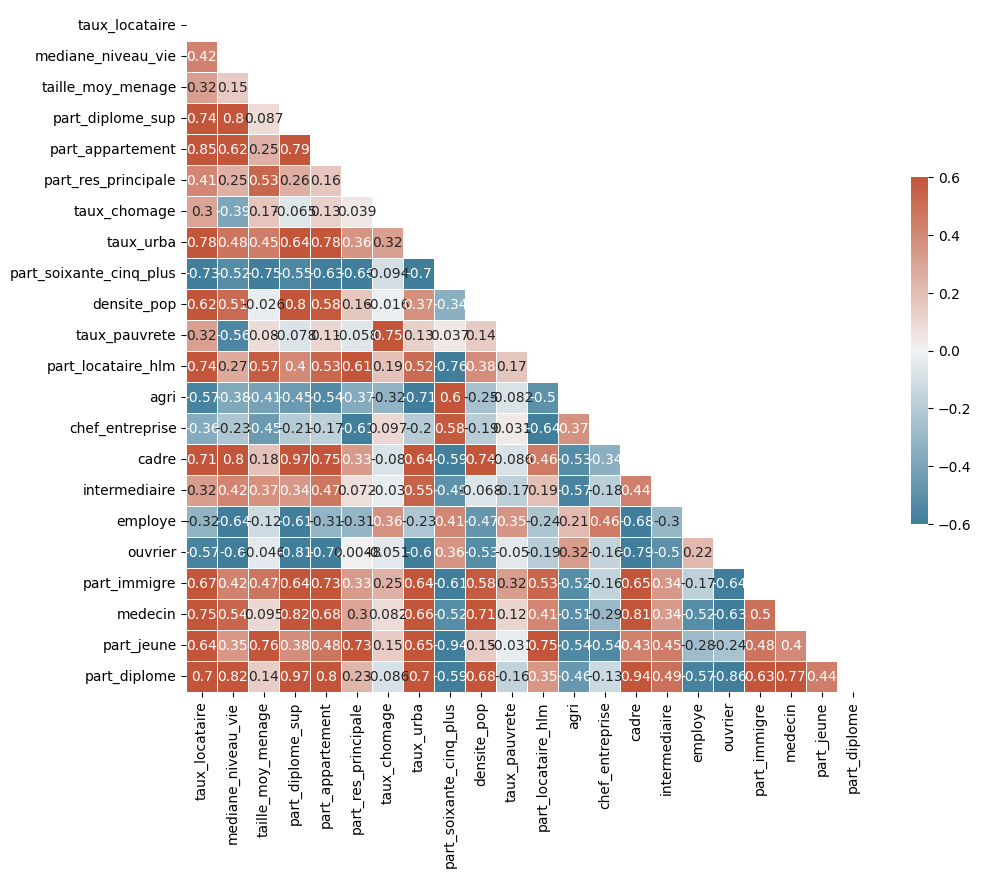

In [339]:
# Matrice de corrélation
corr = data.corr()
display(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr , cmap=cmap, vmax=0.6, vmin=-0.6, center=0, annot=True,mask= mask,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})



In [340]:
"""def vif(variables):

    X = data[variables]

    vif = pd.DataFrame()
    vif['variable'] = X.columns

    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif

variables_exp = ['part_appartement','taux_chomage', 'mediane_niveau_vie', 'taux_urba', 'part_cadre_sup']


vif(variables_exp).sort_values('VIF', ascending=False)"""

'def vif(variables):\n\n    X = data[variables]\n\n    vif = pd.DataFrame()\n    vif[\'variable\'] = X.columns\n\n    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]\n\n    return vif\n\nvariables_exp = [\'part_appartement\',\'taux_chomage\', \'mediane_niveau_vie\', \'taux_urba\', \'part_cadre_sup\']\n\n\nvif(variables_exp).sort_values(\'VIF\', ascending=False)'

In [341]:
reg = smf.ols(formula='taux_locataire ~ taille_moy_menage', data=data).fit()
print(reg.summary())
print(reg.condition_number)

                            OLS Regression Results                            
Dep. Variable:         taux_locataire   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     10.59
Date:                Sat, 12 Nov 2022   Prob (F-statistic):            0.00158
Time:                        15:09:51   Log-Likelihood:                -314.25
No. Observations:                  96   AIC:                             632.5
Df Residuals:                      94   BIC:                             637.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9132     12.12

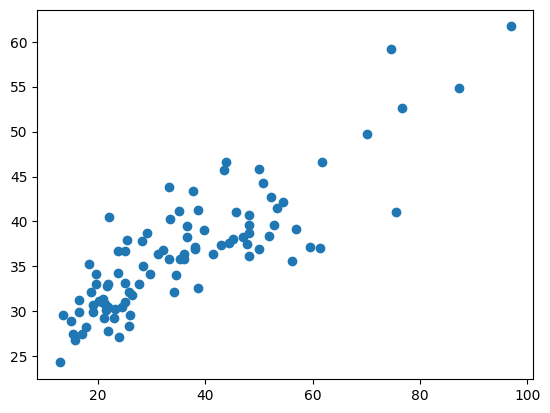

In [345]:
plt.plot(data['part_appartement'], data['taux_locataire'], 'o')
plt.show()

In [343]:
lachancla =[]
for i in data.iloc[:, 2:].columns:
    lachancla.append(i)

yatangaki=[]
for i in range(1,len(lachancla)+1):
   yatangaki.append(list(itertools.combinations(lachancla,i)))

issou=[]
for i in range(len(yatangaki)):
    for j in range(len(yatangaki[i])):
        issou.append('+'.join(yatangaki[i][j]))

print(f'{len(issou)} \n')

"""f = open('output.txt', 'w')

found = 0
for i in range(len(issou)):
    reg = smf.ols(formula = 'morts ~' + issou[i] , data=data).fit()
    if reg.rsquared_adj >= 0.75:
        #f.write(f'{issou[i]} R = {reg.rsquared} prob(F-stat) ={reg.f_pvalue} \n')
        f.write(f'{issou[i]} \n{reg.summary()} \n')
        found += 1

    print(f'loading : {round((i/65535) * 100,2)} %          Reg : {i}            Founded : {found}', end="\r")
    time.sleep(0.001)"""

1048575 



'f = open(\'output.txt\', \'w\')\n\nfound = 0\nfor i in range(len(issou)):\n    reg = smf.ols(formula = \'morts ~\' + issou[i] , data=data).fit()\n    if reg.rsquared_adj >= 0.75:\n        #f.write(f\'{issou[i]} R = {reg.rsquared} prob(F-stat) ={reg.f_pvalue} \n\')\n        f.write(f\'{issou[i]} \n{reg.summary()} \n\')\n        found += 1\n\n    print(f\'loading : {round((i/65535) * 100,2)} %          Reg : {i}            Founded : {found}\', end="\r")\n    time.sleep(0.001)'